# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd 

t_archive=pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
import requests
import os
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
image_pred=pd.read_csv('image-predictions.tsv',sep="\t")
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [31]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = t_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968


Rate limit reached. Sleeping for: 192


Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811: 771380798096281600
Success
812: 771171053431250945
Success
813: 771136648247640064
Success
814: 771102124360998913
Success
815: 771014301343748096
Success
816: 771004394259247104
Fail
817: 770787852854652928
Success
818: 770772759874076672
Success
819: 770743923962707968
Fail
820: 770655142660169732
Success
821: 770414278348247044
Success
822: 770293558247038976
Success
823: 770093767776997377
Success
824: 7

Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
1066: 740711788199743490
Success
1067: 740699697422163968
Success
1068: 740676976021798912
Success
1069: 740373189193256964
Success
1070: 740365076218183684
Success
1071: 740359016048689152
Success
1072: 740214038584557568
Success
1073: 739979191639244800
Success
1074: 739932936087216128
Success
1075: 739844404073074688
Success
1076: 739623569819336705
Success
1077: 739606147276148736
Success
1078: 739544079319588864
Success
10

Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
1327: 706153300320784384
Success
13

Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
15

Rate limit reached. Sleeping for: 395


Success
1693: 681302363064414209
Success
1694: 681297372102656000
Success
1695: 681281657291280384
Success
1696: 681261549936340994
Success
1697: 681242418453299201
Success
1698: 681231109724700672
Success
1699: 681193455364796417
Success
1700: 680970795137544192
Success
1701: 680959110691590145
Success
1702: 680940246314430465
Success
1703: 680934982542561280
Success
1704: 680913438424612864
Success
1705: 680889648562991104
Success
1706: 680836378243002368
Success
1707: 680805554198020098
Success
1708: 680801747103793152
Success
1709: 680798457301471234
Success
1710: 680609293079592961
Success
1711: 680583894916304897
Success
1712: 680497766108381184
Success
1713: 680494726643068929
Success
1714: 680473011644985345
Success
1715: 680440374763077632
Success
1716: 680221482581123072
Success
1717: 680206703334408192
Success
1718: 680191257256136705
Success
1719: 680176173301628928
Success
1720: 680161097740095489
Success
1721: 680145970311643136
Success
1722: 680130881361686529
Success
17

Success
1942: 673715861853720576
Success
1943: 673711475735838725
Success
1944: 673709992831262724
Success
1945: 673708611235921920
Success
1946: 673707060090052608
Success
1947: 673705679337693185
Success
1948: 673700254269775872
Success
1949: 673697980713705472
Success
1950: 673689733134946305
Success
1951: 673688752737402881
Success
1952: 673686845050527744
Success
1953: 673680198160809984
Success
1954: 673662677122719744
Success
1955: 673656262056419329
Success
1956: 673636718965334016
Success
1957: 673612854080196609
Success
1958: 673583129559498752
Success
1959: 673580926094458881
Success
1960: 673576835670777856
Success
1961: 673363615379013632
Success
1962: 673359818736984064
Success
1963: 673355879178194945
Success
1964: 673352124999274496
Success
1965: 673350198937153538
Success
1966: 673345638550134785
Success
1967: 673343217010679808
Success
1968: 673342308415348736
Success
1969: 673320132811366400
Success
1970: 673317986296586240
Success
1971: 673295268553605120
Success
19

Success
2191: 668960084974809088
Success
2192: 668955713004314625
Success
2193: 668932921458302977
Success
2194: 668902994700836864
Success
2195: 668892474547511297
Success
2196: 668872652652679168
Success
2197: 668852170888998912
Success
2198: 668826086256599040
Success
2199: 668815180734689280
Success
2200: 668779399630725120
Success
2201: 668655139528511488
Success
2202: 668645506898350081
Success
2203: 668643542311546881
Success
2204: 668641109086707712
Success
2205: 668636665813057536
Success
2206: 668633411083464705
Success
2207: 668631377374486528
Success
2208: 668627278264475648
Success
2209: 668625577880875008
Success
2210: 668623201287675904
Success
2211: 668620235289837568
Success
2212: 668614819948453888
Success
2213: 668587383441514497
Success
2214: 668567822092664832
Success
2215: 668544745690562560
Success
2216: 668542336805281792
Success
2217: 668537837512433665
Success
2218: 668528771708952576
Success
2219: 668507509523615744
Success
2220: 668496999348633600
Success
22

In [4]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [5]:
tweets_info = []
for tweet_id in tweets:
    ids = tweet_id['id']
    retweets= tweet_id['retweet_count']
    favourites = tweet_id['favorite_count']
    tweets_info.append({'tweet_id': ids, 'retweets' : retweets,'favorites': favourites})
    
tweets_info_df = pd.DataFrame(tweets_info, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_info_df.head()

,tweet_id,retweets,favorites
0,892420643555336193,7153,34418
1,892177421306343426,5380,29849
2,891815181378084864,3545,22466
3,891689557279858688,7366,37629
4,891327558926688256,7909,35933


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 
**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [249]:
#make a copy for each dataframe
t_archive_copy= t_archive.copy()
image_pred_copy= image_pred.copy()
tweets_info_df_copy = tweets_info_df.copy()

In [10]:
t_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
t_archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
t_archive_copy.query(' name == "None" or name=="a"')['text'].count()

800

In [14]:
t_archive_copy.text.str.startswith("This").sum()

1205

In [15]:
t_archive_copy.shape[0]

2356

In [16]:
t_archive_copy[t_archive_copy.name.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
names=t_archive_copy.query(' name != "None" or name!="a"')

In [18]:
names.shape[0]

2356

In [19]:
names[~(names.text.str.startswith("This"))].head(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None


In [20]:
t_archive_copy.query('name == "such"').text.values[0]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

In [21]:
t_archive_copy[t_archive_copy.puppo !="None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
397,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,None,None,None,puppo


In [22]:
t_archive_copy.retweeted_status_id.notnull().sum()

181

In [23]:
image_pred_copy.shape[0]

2075

In [24]:
t_archive_copy.duplicated().sum()

0

In [25]:
image_pred_copy.duplicated().sum()

0

In [26]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
tweets_info_df_copy.head()

,tweet_id,retweets,favorites
0,892420643555336193,7153,34418
1,892177421306343426,5380,29849
2,891815181378084864,3545,22466
3,891689557279858688,7366,37629
4,891327558926688256,7909,35933


In [29]:
tweets_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2328 non-null   int64
 1   retweets   2328 non-null   int64
 2   favorites  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Quality issues
#### `t_archive_copy` table
1. tweet_id int64 instead of being string 

2. unnecessary columns in our case ,could be deleted(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id,source,retweeted_status_timestamp,expanded_urls and timestamp columns and true_breed in the end) 

3. missing values in expanded_urls column 

4. names with None values and 'a' value and the dog name (such) is wrong name 

5. missing tweet_id values that doesn't exist in `image_pred_copy` table `tweets_info_df_copy` table and vice varse

6. no need to the retweets rows

7.  Ratings with decimal values incorrectly extracted

8. "None" values  in names must be converted to NULL objects


### Tidiness issues
1. `tweets_info_df_copy` table should be part of `t_archive_copy` table

2. predicted breed(p1 column) in `image_pred_copy` table should be part of the 
 `t_archive_copy` table and no longer need to the `image_pred_copy` table

3. Dog stages need to be combined into one column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Missing Data

#### missing tweet_id values from `t_archive_copy` table that doesn't exist in `image_pred_copy` table and `tweets_info_df_copy` table and vice varse

#### Define: drop every row has a tweet_id value doesn't exist in all tables

#### Code

In [250]:
archive_ids=t_archive_copy.tweet_id.values

pred_ids= image_pred_copy.tweet_id.values

info_ids= tweets_info_df_copy.tweet_id.values

In [251]:
len(archive_ids),len(pred_ids),len(info_ids)

(2356, 2075, 2328)

In [252]:
shared_ids=[]
for t_id in archive_ids:
    if t_id in pred_ids and t_id in info_ids:
        shared_ids.append(t_id)

In [253]:
len(shared_ids)

2058

In [254]:
t_archive_copy= t_archive_copy.query('tweet_id in @shared_ids')
t_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [255]:
image_pred_copy= image_pred_copy.query('tweet_id in @shared_ids')
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [256]:
tweets_info_df_copy= tweets_info_df_copy.query('tweet_id in @shared_ids')
tweets_info_df_copy.head()

,tweet_id,retweets,favorites
0,892420643555336193,7153,34418
1,892177421306343426,5380,29849
2,891815181378084864,3545,22466
3,891689557279858688,7366,37629
4,891327558926688256,7909,35933


#### Test

In [257]:
t_archive_copy.shape[0],image_pred_copy.shape[0],tweets_info_df_copy.shape[0]

(2058, 2058, 2058)

In [258]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

##### Notice that the missing values in expanded_urls column were solved as you can see above

### Tidiness

#### `tweets_info_df_copy` table should be part of `t_archive_copy` table

#### Define:merge `tweets_info_df_copy` with `t_archive_copy` 

#### Code

In [259]:
t_archive_copy = pd.merge(t_archive_copy,tweets_info_df_copy,how='inner',on='tweet_id')

#### Test

In [260]:
t_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites'],
      dtype='object')

#### predicted breed(p1 column) and p1_dog column in `image_pred_copy` table should be part of the `t_archive_copy` table

#### Define:merge p1 and p1_dog columns in `image_pred_copy` with `t_archive_copy` 

#### Code

In [261]:
img_pred_breed=image_pred_copy[['tweet_id','p1','p1_dog']]
t_archive_copy = pd.merge(t_archive_copy,img_pred_breed,how='inner',on='tweet_id')

#### Test

In [262]:
t_archive_copy.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites,p1,p1_dog
759,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,...,10,None,None,None,None,puppo,3227,7005,swing,False


In [263]:
t_archive_copy=t_archive_copy.rename(columns={"p1":"breed","p1_dog":"true_breed"})

In [264]:
t_archive_copy.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites,breed,true_breed
773,750719632563142656,NaN,NaN,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750719632...,...,10,Meyer,None,None,None,None,4682,12513,Pembroke,True


#### unnecessary columns in our  case (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id,source,retweeted_status_timestamp) 

#### Define: drop these columns(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id,source,retweeted_status_timestamp)

#### Code

In [265]:
col_arr=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','source']
t_archive_copy= t_archive_copy.drop(columns=col_arr)

In [266]:
t_archive_copy=t_archive_copy.drop(columns='retweeted_status_timestamp')

#### Test

In [267]:
t_archive_copy.sample(1)

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites,breed,true_breed
450,801958328846974976,2016-11-25 01:18:59 +0000,This is Ronnie. He hopes you're having a great...,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None,1628,7512,Staffordshire_bullterrier,True


#### Dog stages need to be combined into one column

#### Define: combined doggo', 'floofer', 'pupper', 'puppo' columns into one column

#### Code

In [269]:
t_archive_copy.loc[(t_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites,breed,true_breed
151,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMa...,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,16444,42696,flat-coated_retriever,True
157,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,2854,15131,English_springer,True
357,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,2558,10409,curly-coated_retriever,True
420,808106460588765185,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,2111,8554,golden_retriever,True
448,802265048156610565,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,1321,6734,Labrador_retriever,True
454,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another d...,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,2011,7830,dalmatian,True
556,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You...,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,2141,7603,porcupine,False
616,775898661951791106,2016-09-14 03:27:11 +0000,"RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,15856,0,golden_retriever,True
654,770093767776997377,2016-08-29 03:00:36 +0000,RT @dog_rates: This is just downright precious...,7.410673e+17,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,2878,0,golden_retriever,True
710,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,1796,5688,golden_retriever,True


In [270]:
t_archive_copy.doggo.replace('None', '', inplace=True)
t_archive_copy.doggo.replace(np.NaN, '', inplace=True)
t_archive_copy.puppo.replace('None', '', inplace=True)
t_archive_copy.puppo.replace(np.NaN, '', inplace=True)
t_archive_copy.pupper.replace('None', '', inplace=True)
t_archive_copy.pupper.replace(np.NaN, '', inplace=True)
t_archive_copy.floofer.replace('None', '', inplace=True)
t_archive_copy.floofer.replace(np.NaN, '', inplace=True)

In [271]:
t_archive_copy['stage'] = t_archive_copy.doggo + t_archive_copy.floofer + t_archive_copy.pupper + t_archive_copy.puppo
t_archive_copy.loc[t_archive_copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
t_archive_copy.loc[t_archive_copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
t_archive_copy.loc[t_archive_copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [272]:
t_archive_copy=t_archive_copy.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [273]:
t_archive_copy.stage.value_counts()

                 1740
pupper            210
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Quality 

#### tweet_id data type int64 instead of being string for all three dataframes

#### Define:change the date type of  tweet_id to string using astype method for the 3 dataframes

#### Code

In [275]:
t_archive_copy.tweet_id=t_archive_copy.tweet_id.astype(str)
image_pred_copy.tweet_id=image_pred_copy.tweet_id.astype(str)
tweets_info_df_copy.tweet_id=tweets_info_df_copy.tweet_id.astype(str)

#### Test

In [276]:
t_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2058 non-null   object 
 1   timestamp            2058 non-null   object 
 2   text                 2058 non-null   object 
 3   retweeted_status_id  72 non-null     float64
 4   expanded_urls        2058 non-null   object 
 5   rating_numerator     2058 non-null   int64  
 6   rating_denominator   2058 non-null   int64  
 7   name                 2058 non-null   object 
 8   retweets             2058 non-null   int64  
 9   favorites            2058 non-null   int64  
 10  breed                2058 non-null   object 
 11  true_breed           2058 non-null   bool   
 12  stage                2058 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 211.0+ KB


In [277]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2058 non-null   object 
 1   jpg_url   2058 non-null   object 
 2   img_num   2058 non-null   int64  
 3   p1        2058 non-null   object 
 4   p1_conf   2058 non-null   float64
 5   p1_dog    2058 non-null   bool   
 6   p2        2058 non-null   object 
 7   p2_conf   2058 non-null   float64
 8   p2_dog    2058 non-null   bool   
 9   p3        2058 non-null   object 
 10  p3_conf   2058 non-null   float64
 11  p3_dog    2058 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 166.8+ KB


In [278]:
tweets_info_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2058 non-null   object
 1   retweets   2058 non-null   int64 
 2   favorites  2058 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.3+ KB


#### no need to the retweets rows

#### Define: drop the retweets rows from all dataframes starting with `t_archive_copy` table

#### Code

In [279]:
retweets= t_archive_copy[t_archive_copy.retweeted_status_id.notna()]
retweets_ids= retweets.tweet_id.values

t_archive_copy=t_archive_copy.query('tweet_id not in @retweets_ids')
archive_ids1= t_archive_copy.tweet_id.values
pred_ids1= image_pred_copy.tweet_id.values
info_ids1= tweets_info_df_copy.tweet_id.values

shared_ids1=[]
for t_id1 in archive_ids1:
    if t_id1 in pred_ids1 and t_id1 in info_ids1:
        shared_ids1.append(t_id1)

In [280]:
t_archive_copy= t_archive_copy.query('tweet_id in @shared_ids1')
t_archive_copy.head(2)

,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7153,34418,orange,False,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5380,29849,Chihuahua,True,


In [281]:
image_pred_copy= image_pred_copy.query('tweet_id in @shared_ids1')
image_pred_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [282]:
tweets_info_df_copy= tweets_info_df_copy.query('tweet_id in @shared_ids1')
tweets_info_df_copy.head(2)

,tweet_id,retweets,favorites
0,892420643555336193,7153,34418
1,892177421306343426,5380,29849


#### Test

In [283]:
t_archive_copy[t_archive_copy.retweeted_status_id.notna()]


,tweet_id,timestamp,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage


In [284]:
#drop the retweeted_status_id column since we don't need it anymore
t_archive_copy=t_archive_copy.drop(columns='retweeted_status_id')
t_archive_copy.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7153,34418,orange,False,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5380,29849,Chihuahua,True,


In [285]:
t_archive_copy.shape[0],image_pred_copy.shape[0],tweets_info_df_copy.shape[0]

(1986, 1986, 1986)

#### names with None values and 'a' value and the dog name (such) is wrong name can't be edited so drop it

#### Define: drop rows that have names with value None then extract names for rows with "a" value if possible and drop them if not and drop the dog name (such) in all dataframes

In [286]:
none_ids=t_archive_copy.query(' name == "None"').tweet_id.values
t_archive_copy=t_archive_copy.query('tweet_id not in @none_ids')

archive_ids2= t_archive_copy.tweet_id.values
pred_ids2= image_pred_copy.tweet_id.values
info_ids2= tweets_info_df_copy.tweet_id.values

shared_ids2=[]
for t_id2 in archive_ids2:
    if t_id2 in pred_ids2 and t_id2 in info_ids2:
        shared_ids2.append(t_id2)

In [287]:
t_archive_copy= t_archive_copy.query('tweet_id in @shared_ids2')
t_archive_copy.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7153,34418,orange,False,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5380,29849,Chihuahua,True,


In [288]:
image_pred_copy= image_pred_copy.query('tweet_id in @shared_ids2')
image_pred_copy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [289]:
tweets_info_df_copy= tweets_info_df_copy.query('tweet_id in @shared_ids2')
tweets_info_df_copy.head(2)

,tweet_id,retweets,favorites
0,892420643555336193,7153,34418
1,892177421306343426,5380,29849


In [290]:
a_values=t_archive_copy.query(' name == "a"')

In [291]:
a_values.shape[0]

55

In [292]:
a_values[a_values.text.str.contains('named')].shape[0]

19

In [293]:
#filtering the "a" values the might be fixed using extract
a_values= a_values[a_values.text.str.contains('named')]

In [294]:
a_values.text.values

array(["This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI",
       'This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3',
       'This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7',
       "This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr",
       'This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo',
       "This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj",
       "This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bi

#### here it apperes that we can get the names notice that the names are between the word "named" and the dot(.)

In [295]:
start_indexs=a_values.text.str.index('named')
end_indexs=a_values.text.str.index('.')


In [296]:
a_text=a_values.text.values

In [297]:
a_text_v1=[]
for text in a_text:
    text=(text.split('. '))[0]
    a_text_v1.append(text)

In [298]:
#extract the names
for i in range(len(a_text_v1)):
    a_text_v1[i]=a_text_v1[i][(start_indexs[start_indexs.index[i]])+5:end_indexs[end_indexs.index[i]]]

In [299]:
dogs_names=a_text_v1
dogs_names

[' Wylie',
 ' Kip',
 ' Jacob (Yacōb)',
 ' Rufus',
 ' Spork',
 ' Cherokee',
 ' Hemry',
 ' Alphred',
 ' Alfredo',
 ' Leroi',
 ' Chuk',
 ' Alfonso',
 ' Cheryl',
 ' Jessiga',
 ' Klint',
 ' Kohl',
 ' Pepe',
 ' Octaviath',
 ' Johm']

In [300]:
a_values.name=dogs_names

In [301]:
a_values

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage
1565,675706639471788032,2015-12-12 15:59:51 +0000,This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10,10,Wylie,86,598,English_springer,True,
1662,673636718965334016,2015-12-06 22:54:44 +0000,This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,Kip,328,1013,wombat,False,
1741,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11,10,Jacob (Yacōb),209,685,toy_poodle,True,
1772,671147085991960577,2015-11-30 02:01:49 +0000,This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,Rufus,199,596,Yorkshire_terrier,True,
1822,670427002554466305,2015-11-28 02:20:27 +0000,This is a Deciduous Trimester mix named Spork....,https://twitter.com/dog_rates/status/670427002...,9,10,Spork,145,475,seat_belt,False,
1831,670361874861563904,2015-11-27 22:01:40 +0000,This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9,10,Cherokee,59,296,platypus,False,
1834,670303360680108032,2015-11-27 18:09:09 +0000,This is a Speckled Cauliflower Yosemite named ...,https://twitter.com/dog_rates/status/670303360...,9,10,Hemry,116,396,Shetland_sheepdog,True,
1852,669923323644657664,2015-11-26 16:59:01 +0000,This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10,10,Alphred,53,208,car_mirror,False,
1866,669564461267722241,2015-11-25 17:13:02 +0000,This is a Coriander Baton Rouge named Alfredo....,https://twitter.com/dog_rates/status/669564461...,10,10,Alfredo,107,350,toy_poodle,True,
1895,668955713004314625,2015-11-24 00:54:05 +0000,This is a Slovakian Helter Skelter Feta named ...,https://twitter.com/dog_rates/status/668955713...,10,10,Leroi,64,247,cocker_spaniel,True,


In [302]:
edited_ids=a_values.tweet_id.values

In [303]:
droped_ids=t_archive_copy.query(' name == "a"').tweet_id.values
t_archive_copy=t_archive_copy.query('tweet_id not in @droped_ids')

In [304]:
t_archive_copy.query(' name == "a"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,favorites,breed,true_breed,stage


In [305]:
t_archive_copy.shape[0]

1386

In [306]:
#add the rows that have names
t_archive_copy=pd.concat([t_archive_copy, a_values], ignore_index=True)


In [307]:
such_id=t_archive_copy.query('name == "such"').tweet_id.values

In [308]:
t_archive_copy=t_archive_copy.query('tweet_id not in @such_id')

#### Test

In [309]:
t_archive_copy.shape[0]

1404

#### don't need rows with wrong breed prediction

#### Define: drop rows with wrong breed prediction

In [310]:
false_pred_ids=t_archive_copy[t_archive_copy.true_breed ==False].tweet_id.values

In [311]:
t_archive_copy=t_archive_copy.query('tweet_id not in @false_pred_ids')

#### Test

In [312]:
t_archive_copy.shape[0]

1078

#### no need to expanded_urls , timestamp and true_breed columns

#### Define:drop the expanded_urls , timestamp and true_breed columns

#### Code

In [313]:
t_archive_copy=t_archive_copy.drop(columns=['timestamp','expanded_urls','true_breed'])

#### Test

In [314]:
t_archive_copy.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,retweets,favorites,breed,stage
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,5380,29849,Chihuahua,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3545,22466,Chihuahua,


#### Ratings with decimal values incorrectly extracted

#### Define:extract ratings using ragex

#### Code

In [315]:
ratings = t_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
t_archive_copy.rating_numerator = ratings

#### Test

In [316]:
t_archive_copy[t_archive_copy.tweet_id=="786709082849828864"]

,tweet_id,text,rating_numerator,rating_denominator,name,retweets,favorites,breed,stage
405,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,5856,17674,Pomeranian,


#### "None" values  in names must be converted to NULL objects

#### Define:replace None values with null  in names using replace

#### Code

In [320]:
import numpy as np
t_archive_copy.name.replace('None',np.nan,inplace=True)
t_archive_copy.name.replace('',np.nan,inplace=True)

#### Test

In [322]:
t_archive_copy[t_archive_copy.name!=np.nan]

,tweet_id,text,rating_numerator,rating_denominator,name,retweets,favorites,breed,stage
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,5380,29849,Chihuahua,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3545,22466,Chihuahua,
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,7909,35933,basset,
5,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,1705,10559,Appenzeller,
6,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,3691,24979,Irish_terrier,
...,...,...,...,...,...,...,...,...,...
1399,667773195014021121,This is a rare Hungarian Pinot named Jessiga. ...,8,10,Jessiga,46,211,West_Highland_white_terrier,
1400,667538891197542400,This is a southwest Coriander named Klint. Hat...,9,10,Klint,59,180,Yorkshire_terrier,
1401,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11,10,Kohl,86,227,toy_poodle,
1403,666781792255496192,This is a purebred Bacardi named Octaviath. Ca...,10,10,Octaviath,171,338,Italian_greyhound,


In [323]:
t_archive_copy.shape[0]

1078

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [326]:
t_archive_copy.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [327]:
t_archive_clean=pd.read_csv('twitter_archive_master.csv')
t_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,retweets,favorites,breed,stage
785,683142553609318400,Meet Brandy. She's a member of the Bloods. Men...,9.0,10,Brandy,971,2697,Leonberg,pupper
152,833863086058651648,This is Bentley. Hairbrushes are his favorite ...,12.0,10,Bentley,2258,12854,kuvasz,NaN
645,705898680587526145,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,10.0,10,Max,512,2245,collie,NaN
124,844973813909606400,This is Brady. He's a recovering alcoholic. De...,12.0,10,Brady,2922,14224,Labrador_retriever,NaN
223,817171292965273600,This is Tebow. He kindly requests that you put...,13.0,10,Tebow,1919,8454,golden_retriever,NaN


### Insights:
1. The name of the dogs with the most favorites

2. Relationship between favorites and breed 

3. Relationship between retweets and breed 

In [328]:
name_max_fav=t_archive_clean.query('favorites == favorites.max()')['name']
name_max_fav

262    Stephan
Name: name, dtype: object

### Visualization

In [329]:
import matplotlib.pyplot as plt
%matplotlib inline 

<BarContainer object of 1078 artists>

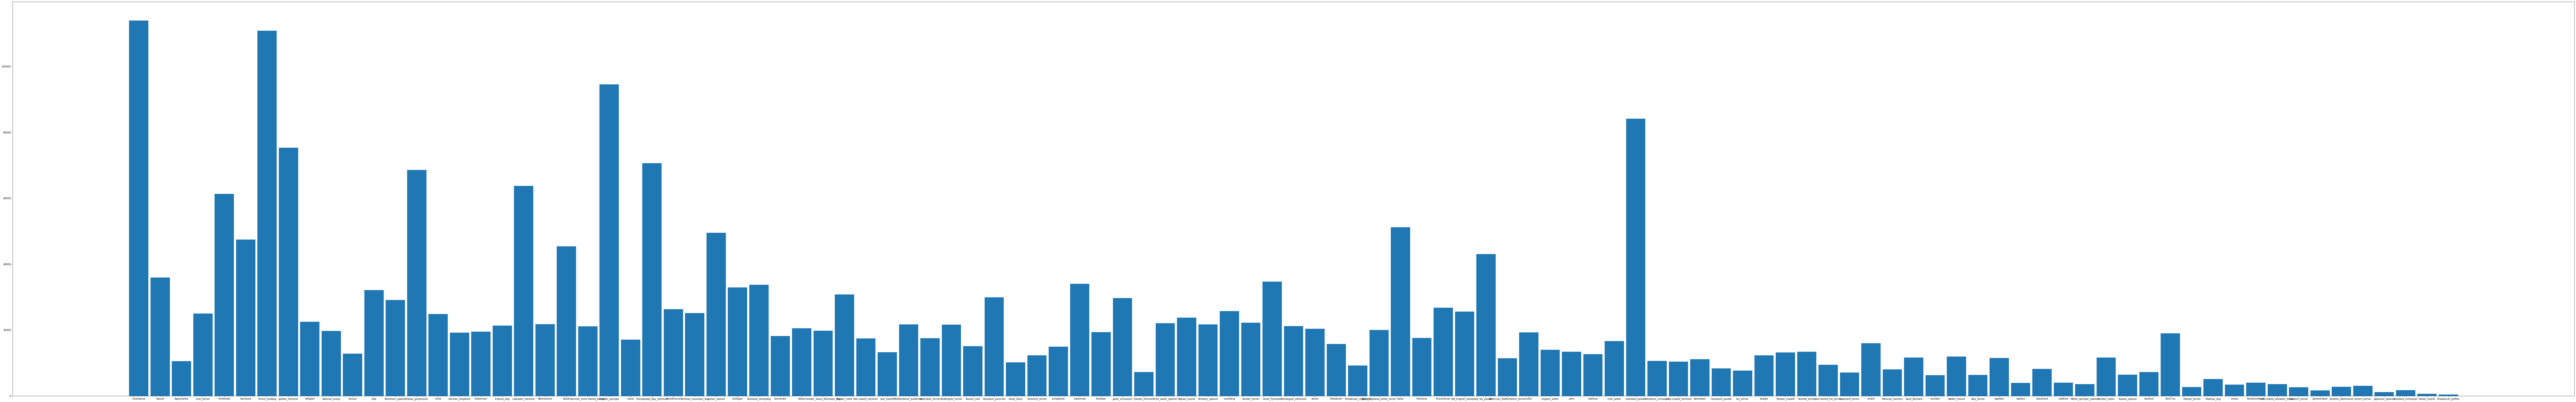

In [330]:
plt.subplots(figsize=(190,30))
plt.bar(t_archive_clean.breed,t_archive_clean.favorites,width= 0.9)

#### here we can find that Chihuahua and French bulldog have the most favorites(likes)  

<BarContainer object of 1078 artists>

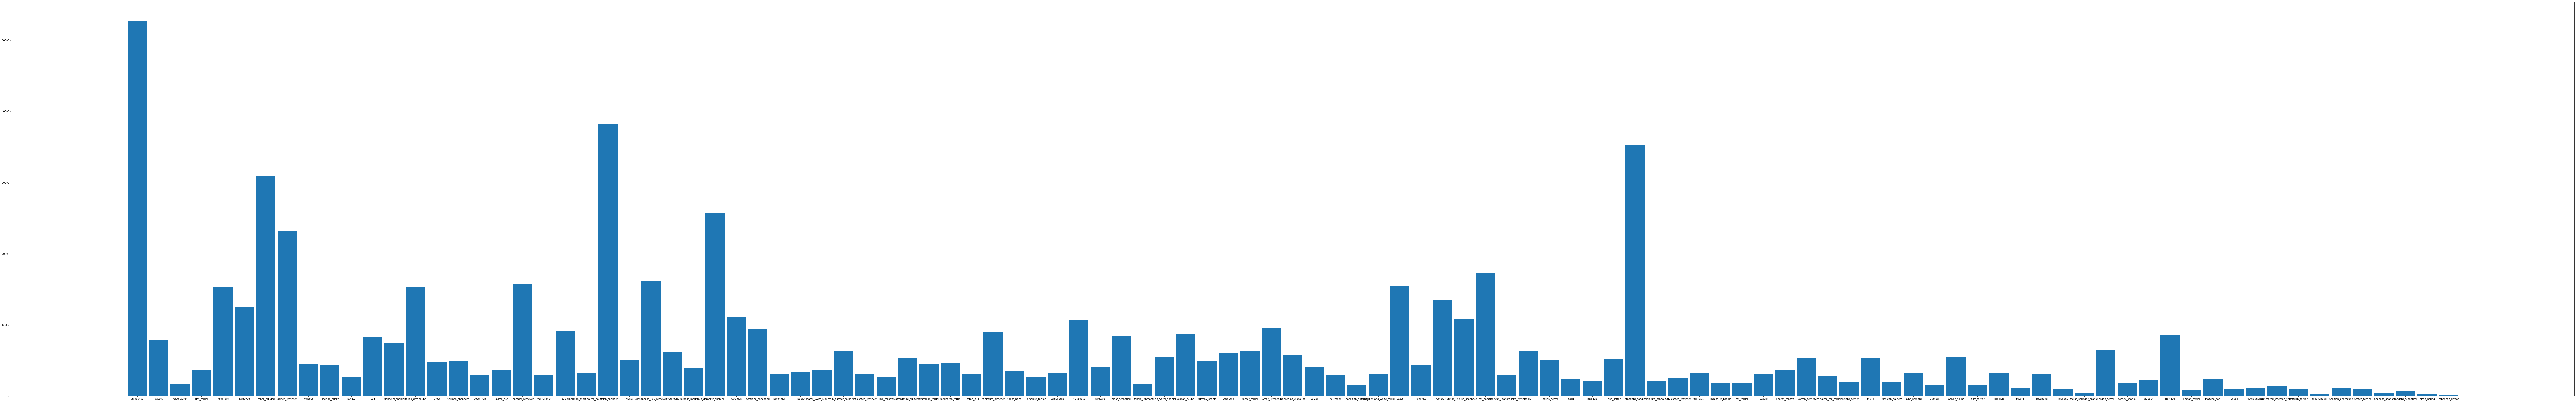

In [331]:
plt.subplots(figsize=(190,30))
plt.bar(t_archive_clean.breed,t_archive_clean.retweets,width= 0.9)

#### here we can see that people are more likely to retweet when the dog of Chihuahua or English springer breeds

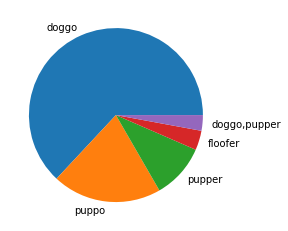

In [346]:
labels=t_archive_clean.stage.unique()

plt.pie(t_archive_clean.stage.value_counts(),labels=labels[1:]);

**here we can see that dogs with stage doggo are the most**